**1. Importing Libraries**

---

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

**2. Loading Data**

---



In [9]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

**3. Preparing Data**

---



In [10]:
X_train = train_data.drop('Class', axis=1)
y_train = train_data['Class']
X_test = test_data.drop('Class', axis=1)
y_test = test_data['Class']

**4. Oversampling Technique**

---



In [11]:
oversampler = RandomOverSampler(sampling_strategy=0.8)
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)

**5. Undersampling Technique**

---



In [12]:
undersampler = RandomUnderSampler(sampling_strategy=0.8)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

**6. Logistic Regression and Prediction with Oversampling**

---



In [13]:
model_over = LogisticRegression()
model_over.fit(X_train_over, y_train_over)

y_pred_over = model_over.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**7. Logistic Regression and Prediction with Undersampling**

---



In [14]:
model_under = LogisticRegression()
model_under.fit(X_train_under, y_train_under)

y_pred_under = model_under.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**8. Weighted Logistic Regression and Prediction**

---



In [15]:
model_weighted = LogisticRegression(class_weight='balanced')
model_weighted.fit(X_train, y_train)

y_pred_weighted = model_weighted.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**9. Evaluation Metrics**

---



In [16]:
def calculate_metrics(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    return precision, recall, f1, accuracy

# Metrics for Oversampling
precision_over, recall_over, f1_over, accuracy_over = calculate_metrics(y_test, y_pred_over)

# Metrics for Undersampling
precision_under, recall_under, f1_under, accuracy_under = calculate_metrics(y_test, y_pred_under)

# Metrics for Weighted Logistic Regression
precision_weighted, recall_weighted, f1_weighted, accuracy_weighted = calculate_metrics(y_test, y_pred_weighted)

**10. Reporting Results**

---



In [17]:
print("Weighted Logistic Regression:")
print(f"Precision: {precision_weighted:.4f}")
print(f"Recall: {recall_weighted:.4f}")
print(f"F1-Score: {f1_weighted:.4f}")
print(f"Accuracy: {accuracy_weighted:.4f}\n")

print("Logistic Regression with Oversampling:")
print(f"Precision: {precision_over:.4f}")
print(f"Recall: {recall_over:.4f}")
print(f"F1-Score: {f1_over:.4f}")
print(f"Accuracy: {accuracy_over:.4f}\n")

print("Logistic Regression with Undersampling:")
print(f"Precision: {precision_under:.4f}")
print(f"Recall: {recall_under:.4f}")
print(f"F1-Score: {f1_under:.4f}")
print(f"Accuracy: {accuracy_under:.4f}")

Weighted Logistic Regression:
Precision: 0.8835
Recall: 0.8981
F1-Score: 0.8907
Accuracy: 0.9131

Logistic Regression with Oversampling:
Precision: 0.8932
Recall: 0.8981
F1-Score: 0.8956
Accuracy: 0.9175

Logistic Regression with Undersampling:
Precision: 0.8849
Recall: 0.8898
F1-Score: 0.8874
Accuracy: 0.9110


**11. Confusion Matrix Visualization**

---



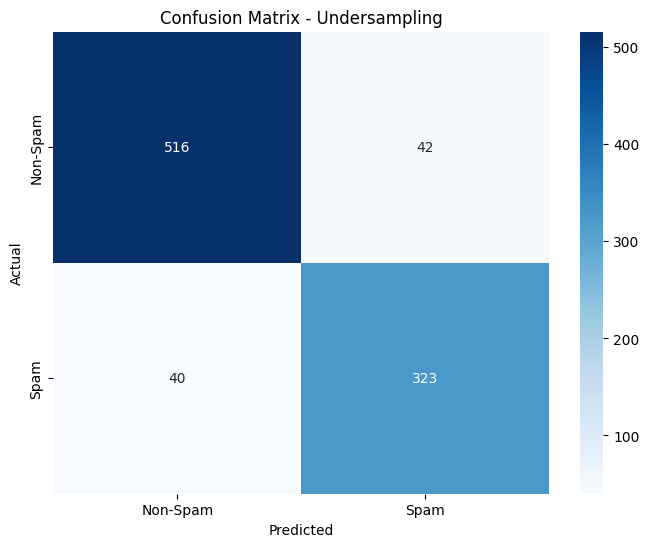

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_under), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
plt.title('Confusion Matrix - Undersampling')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()